<a href="https://colab.research.google.com/github/asimoya99/Machine-Learning-Samples/blob/master/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris  = load_iris()

X = iris.data[:, (2,3)] # petal length, petal width
y = (iris.target == 0).astype(np.int) # iris setosa

per_clf = Perceptron()
per_clf.fit(X,y)
y_pred = per_clf.predict([[2,0.5]])

In [0]:
import tensorflow as tf
from tensorflow import  keras
from keras.datasets import fashion_mnist


In [0]:
#building an image classifier

In [0]:
 (X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [0]:
#scaling the pixel intensities  and creating validation dataset
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:]/ 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test/ 255.0

In [0]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
 

In [22]:
class_names[y_train[0]]

'Coat'

In [0]:
#creating a model using a sequential API
from keras.models import Sequential
from keras.layers import Flatten, Dense


In [0]:
model = Sequential()
model.add(Flatten(input_shape = [28,28]))
model.add(Dense(300, activation="relu"))
model.add(Dense(100, activation="relu"))
model.add(Dense(10, activation="softmax"))



In [0]:
model = Sequential([
                    Flatten(input_shape = [28,28]),
                    Dense(300, activation = "relu"),
                    Dense(100, activation= "relu"),
                    Dense(100, activation="relu"),
                    Dense(10,activation="softmax")

])

In [26]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_8 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_9 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_10 (Dense)             (None, 10)                1010      
Total params: 276,710
Trainable params: 276,710
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.layers

In [0]:
#call compile to specify the loss function and the optimizer
model.compile(loss = "sparse_categorical_crossentropy", optimizer="sgd",metrics= ["accuracy"])


In [0]:
#train and validate the model 
history = model.fit(X_train,y_train, epochs=30, validation_data=(X_valid,y_valid))

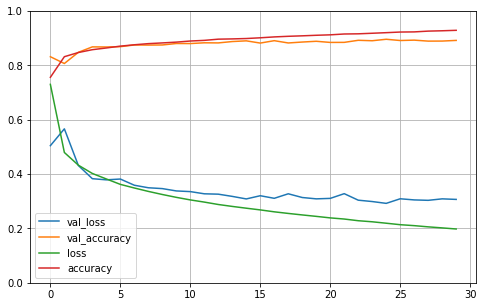

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1) # set the vertical range to [0-1]
plt.show()

In [32]:
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 51us/step


[0.33565152040719987, 0.880299985408783]

In [33]:
#making predictions with the new model
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.03, 0.  , 0.96],
       [0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [34]:
y_pred = model.predict_classes(X_new)
y_pred

array([9, 2, 1])

In [35]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [36]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

In [37]:
y_new

array([9, 2, 1], dtype=uint8)

In [0]:
#building a MLP regression using the Sequential API
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)

#validation data
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)



In [0]:
#modeling and training the model
model = keras.models.Sequential([keras.layers.Dense(30, activation="relu",input_shape = X_train.shape[1:]), keras.layers.Dense(1)])
model.compile(loss ="mean_squared_error", optimizer="sgd")
history = model.fit(X_train,y_train,epochs = 20,validation_data=(X_valid,y_valid))
mse_test = model.evaluate(X_test,y_test)
X_new = X_test[:3] #pretend these are new instances

y_pred = model.predict(X_new)

In [0]:
#using an api to build a complex model
import tensorflow 
from tensorflow.keras.layers import Input, Dense, Concatenate
from tensorflow.keras import Model 


In [0]:
input_ = Input(shape = X_train.shape[1:])
hidden1 = Dense(30, activation="relu")(input_)
hidden2 = Dense(30, activation="relu")(hidden1)
concat = Concatenate()([input_, hidden2])
output = Dense(1)(concat)
model = Model(inputs = [input_], outputs = [output])

In [0]:
input_A = Input(shape=[5], name = "wide_input")
input_B = Input(shape = [6], name = "deep_input")
hidden1 = Dense(30,activation="relu")(input_B)
hidden2 = Dense(20, activation="relu")(hidden1)
concat = Concatenate()([input_A,hidden2])
output = Dense(1,name ="output")(concat)
model = Model(inputs = [input_A, input_B], outputs = [output])


In [53]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 2.0479 - val_loss: 0.9626
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.7446 - val_loss: 0.6817
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6471 - val_loss: 0.6260
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6126 - val_loss: 0.5932
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5892 - val_loss: 0.5708
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5713 - val_loss: 0.5549
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5577 - val_loss: 0.5384
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5463 - val_loss: 0.5272
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5369 - val_loss: 0.5176
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5292 - val_loss: 0.5099

In [0]:
#using subclassing API to build Dynamic Models
class WideAndDeepModel(Model):
  def __init__(self, units = 30, activation = "relu",**kwargs):
    super().__init__(**kwargs) #handles standard args
    self.hidden1 = Dense(units, activation=activation)
    self.hidden2 = Dense(units, activation=activation)
    self.main_output = Dense(1)
    self.aux_output = Dense(1)
  
  def call(self, inputs):
    input_A, input_B = inputs
    hidden1 = self.hidden1(input_B)
    hidden2 = self.hidden2(hidden1)
    concat = Concatenate()([input_A, hidden2])
    main_output = self.main_output(concat)
    aux_output = self.aux_output(hidden2)
    return main_output, aux_output
model = WideAndDeepModel()

In [0]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(lr=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

In [0]:

keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

In [67]:
keras_reg.fit(X_train, y_train, epochs=100,
              validation_data=(X_valid, y_valid),
              callbacks=[keras.callbacks.EarlyStopping(patience=10)])
mse_test = keras_reg.score(X_test, y_test)
y_pred = keras_reg.predict(X_new)

Epoch 1/100
363/363 [==============================] - 1s 2ms/step - loss: 1.1136 - val_loss: 0.6571
Epoch 2/100
363/363 [==============================] - 1s 2ms/step - loss: 0.6448 - val_loss: 0.5860
Epoch 3/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5837 - val_loss: 0.5384
Epoch 4/100
363/363 [==============================] - 1s 1ms/step - loss: 0.5437 - val_loss: 0.5090
Epoch 5/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5146 - val_loss: 0.4901
Epoch 6/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4996 - val_loss: 0.4762
Epoch 7/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4818 - val_loss: 0.4694
Epoch 8/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4716 - val_loss: 0.4622
Epoch 9/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4633 - val_loss: 0.4551
Epoch 10/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4587 - val_lo

In [0]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 100),
    "learning_rate": reciprocal(3e-4, 3e-2),
}

# rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3)
# rnd_search_cv.fit(X_train, y_train, epochs=100,
#                   validation_data=(X_valid, y_valid),
#                   callbacks=[keras.callbacks.EarlyStopping(patience=10)])